# World Happiness Analysis

### This dataset focuses on the happiness metrics of each country, and along with it some other world health statistics

## Research Questions

* What factors contribute to a country's overall happiness?
* What differentiates happy countries from unhappy countries?
* Is there a correlation between happiness and other world statistics?

## Data Collection

Source for original datasets: 
* https://www.kaggle.com/mathurinache/world-happiness-report?select=2020.csv 
* https://data.worldbank.org/indicator/SP.POP.TOTL
* https://data.worldbank.org/indicator/SE.ADT.LITR.ZS?most_recent_year_desc=false&view=chart
* https://data.worldbank.org/indicator/SE.XPD.TOTL.GD.ZS?end=2019&most_recent_year_desc=false&start=1970&view=chart

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [2]:
import warnings
warnings.filterwarnings('ignore')

First, the happiness dataset is loaded and the columns and their values are observed.

In [3]:
df = pd.read_csv('happiness/2019.csv')
df.head()

,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


The statistics being compared to happiness for each country are population, literacy, and government expenditure on education. Datasets are loaded for these.

In [4]:
population = pd.read_csv('population.csv')
population.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,106314.0,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,...,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,38041754.0,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,...,24220661.0,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0,31825295.0,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,83747.0,82427.0,80774.0,79213.0,78011.0,77297.0,77001.0,77006.0,77142.0,NaN


In [5]:
govt_edu_expense = pd.read_csv('government_expenditure_education.csv')       
govt_edu_expense.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,6.11913,6.54906,6.50538,5.90521,5.97571,5.52415,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,3.46201,2.60420,3.45446,3.69522,3.25580,4.22836,4.05887,NaN,NaN,NaN
2,Angola,AGO,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,ALB,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.53930,NaN,3.43797,3.96209,3.61172,NaN,NaN,NaN
4,Andorra,AND,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,2.98706,NaN,2.50616,3.07421,3.28035,3.23707,3.21709,3.24672,3.15162,NaN


In [6]:
rd_expenditure = pd.read_csv('r&d_expenditure.csv')
rd_expenditure.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,Research and development expenditure (% of GDP),GB.XPD.RSDV.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,Research and development expenditure (% of GDP),GB.XPD.RSDV.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,Research and development expenditure (% of GDP),GB.XPD.RSDV.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.03229,NaN,NaN,NaN,NaN
3,Albania,ALB,Research and development expenditure (% of GDP),GB.XPD.RSDV.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,Research and development expenditure (% of GDP),GB.XPD.RSDV.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Cleaning

Datasets are being incorporated from various sources that contain different most recent years for different information. Since the most recent year is not consistent among all the countries in these datasets, this helper function adds a new column that keeps track of the most recent information for that country and another column that keeps track of which year this may be.

In [7]:
'''
NOTE: Use the function be
low caefully. It modifies the dataframe passed in. 
'''
def getMostRecentDataInDF(df, 
                           beginning_year, 
                           ending_year, 
                           new_column_name="most_recent", 
                           new_index_column_name="most_recent_year",
                           keyColumn='country',
                           keepOnlyMain=False
                        ):
    for index, row in df.iterrows():
        for year in reversed(range(beginning_year, ending_year + 1)):
            if not pd.isnull(row[str(year)]):
                df.at[index, new_column_name] = df.loc[index, str(year)]
                df.at[index, new_index_column_name] = year
                break
                
    if keepOnlyMain:
        df.drop(df.columns.difference([keyColumn, new_column_name, new_index_column_name]), 1, inplace = True)
        

Columns are renamed to shorter, more appropriate names to work with. 

In [8]:
df.rename(columns = {'GDP per capita':'gdp_per_capita', 
                     'Social support':'support',
                     'Healthy life expectancy':'life_expectancy', 
                     'Freedom to make life choices':'freedom', 
                     'Perceptions of corruption':'corruption', 
                     'Score': 'l_score', 
                     'Country or region': 'country', 
                     'Generosity': 'generosity'}, inplace = True)
df.head()

,country,l_score,gdp_per_capita,support,life_expectancy,freedom,generosity,corruption
0,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


Countries are then ranked by their ladder score to determine which countries are relatively happier than others.

In [9]:
df["rank"] = df['l_score'].rank() 

Using the regions provided by the dataset for 2020, each country in this datasest is assigned a corresponding region. A new column is created for this.

In [10]:
df2 = pd.read_csv('happiness/2020.csv')
df2.rename(columns={"Country name": "country", "Regional indicator": "r_indicator"}, inplace=True)
df = pd.merge(df, df2[["country", "r_indicator"]], on="country")
df.head()

,country,l_score,gdp_per_capita,support,life_expectancy,freedom,generosity,corruption,rank,r_indicator
0,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,156.0,Western Europe
1,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,155.0,Western Europe
2,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,154.0,Western Europe
3,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,153.0,Western Europe
4,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,152.0,Western Europe


As explained above, the dataset containing government education expenditure for each country has different most recent years when data was collected. The helper function is used to resolve this.

In [11]:
getMostRecentDataInDF(govt_edu_expense, 1960, 2020) 
govt_edu_expense.drop(govt_edu_expense.columns.difference(['Country Name', 'most_recent', 'most_recent_year']), 1, inplace = True)
govt_edu_expense.head()

,Country Name,most_recent,most_recent_year
0,Aruba,5.52415,2016.0
1,Afghanistan,4.05887,2017.0
2,Angola,3.42132,2010.0
3,Albania,3.61172,2017.0
4,Andorra,3.15162,2019.0


The literacy and population datasets get their most recent year for each country in a similar fashion. The final 3 datasets (govt_edu_expense, population, literacy) are all merged into the main happiness dataset.

In [12]:
country_map = {'Country Name': 'country'}
govt_edu_expense.rename(columns=country_map, inplace = True)
population.rename(columns=country_map, inplace = True)
rd_expenditure.rename(columns=country_map, inplace = True)

getMostRecentDataInDF(population, 1960, 2020, new_column_name='est_population', new_index_column_name='last_population_data', keepOnlyMain=True)
getMostRecentDataInDF(rd_expenditure, 1960, 2018, new_column_name='est_research', new_index_column_name='last_research_data', keepOnlyMain=True)

df = df.merge(govt_edu_expense, on='country')
df = df.merge(population, on='country')
df = df.merge(rd_expenditure, on='country')

df.rename(columns={'most_recent': 'est_govt_education_spending',
                   'most_recent_year': 'last_govt_spending_data'},
          inplace=True
         )
df.head()

,country,l_score,gdp_per_capita,support,life_expectancy,freedom,generosity,corruption,rank,r_indicator,est_govt_education_spending,last_govt_spending_data,est_population,last_population_data,est_research,last_research_data
0,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,156.0,Western Europe,6.37621,2017.0,5520314.0,2019.0,2.77381,2018.0
1,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,155.0,Western Europe,7.81608,2017.0,5818553.0,2019.0,3.06408,2018.0
2,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,154.0,Western Europe,7.91198,2017.0,5347896.0,2019.0,2.06985,2018.0
3,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,153.0,Western Europe,7.65822,2017.0,361313.0,2019.0,2.02994,2018.0
4,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,152.0,Western Europe,5.17510,2017.0,17332850.0,2019.0,2.16374,2018.0


Finally, the cleaned datasets are saved to new csv files.

In [13]:
df.to_csv('happiness_final.csv')
govt_edu_expense.to_csv('government_expenditure_education_final.csv')
population.to_csv('population_final.csv')
rd_expenditure.to_csv('r&d_expenditure_final.csv')

df.to_csv('happiness_data_merged.csv')

## Data Description

#### Descriptions of observations and attributes

The rows correspond to different countries in the happiness dataset, and the different factors that affect its quantifiable happiness levels. These factors (which are our columns) include the regional indicator, the ladder score (essentially our happiness score), the Gross Domestic Product Per Capita, social support indicators, life expectancy, percevied freedom to make life choices, perceived level of corruption, and the demographic's generosity. The details of each of these attributes, which their respective column names in the DataFrame, are listed below:
- Country or region (country): The country the data is being reported for
- Regional Indicator (r_indicator): The region is country belongs to (this is different from the continent)
- Score (l_score): The survey measure of SWB is from the Feb 28, 2020 release of the Gallup World Poll (GWP) covering years from 2005 to 2019.
- GDP per capita (gdp_per_capita): The statistics of GDP per capita (variable name gdp) in purchasing power parity (PPP) at constant 2011 international dollar prices are from the November 28, 2019 update of the World Development Indicators (WDI).
- Social support (support): The national average of the binary responses (either 0 or 1) to the GWP question “If you were in trouble, do you have relatives or friends you can count on to help you whenever you need them, or not?”
- Healthy life expectancy (life_expectancy): Healthy life expectancies at birth, which are based on the data extracted from the World Health Organization’s (WHO) Global Health Observatory data repository. 
- Freedom to make life choices (freedom): The national average of responses to the GWP question “Are you satisfied or dissatisfied with your freedom to choose what you do with your life?”
- Generosity (generosity): the residual of regressing national average of response to the GWP question “Have you donated money to a charity in the past month?” on GDP per capita.
- Perceptions of corruption (corruption): The measure is the national average of the survey re- sponses to two questions in the GWP: “Is corruption widespread throughout the government or not” and “Is corruption widespread within businesses or not?” The overall perception is just the average of the two 0-or-1 responses. In case the perception of government corruption is missing, we use the perception of business corruption as the overall perception. The corruption perception at the national level is just the average response of the overall perception at the individual level.

For more information, look at the [following file](files/Statistical_Appendix.pdf) (this is present in the project directory). 

#### Motivation behind creation of dataset
The World Happiness Report 2020 ranks cities around the world by their subjective well-being and digs more deeply into how the social, urban and natural environments combine to affect our happiness. The World Happiness Report may be a point of interest survey of the state of worldwide bliss.  The report proceeds to pick up worldwide acknowledgment as governments, organizations and respectful society progressively utilize joy pointers to educate their policy-making choices. Driving specialists over areas – financial matters, brain research, overview investigation, national insights, wellbeing, open approach and more – depict how estimations of well-being can be used effectively to evaluate the advance of countries.  
Source: https://www.kaggle.com/mathurinache/world-happiness-report

#### Funding
The World Happiness Report is a publication of the Sustainable Development Solutions Network, powered by data from the Gallup World Poll, and supported by the Ernesto Illy Foundation, illycaffè, Davines Group, Blue Chip Foundation, the William, Jeff, and Jennifer Gross Family Foundation, and Unilever’s largest ice cream brand Wall’s. The World Happiness Report was written by a group of independent experts acting in their personal capacities.  
Source: https://worldhappiness.report/


#### Processes might have influenced what data was observed and recorded and what was not
The rankings World Happiness Report 2020 use data that come from the Gallup World Poll (for more information see the Gallup World Poll methodology: https://www.gallup.com/178667/gallup-world-poll-work.aspx). The rankings are based on answers to the main life evaluation question asked in the poll, and the surveyees are sampled from a representative population that lead to a 95% confidence interval in the measurements reported. Gallup weights World Poll samples to correct for unequal selection probability.

The survey results might have been influenced by the surveyors’ ability to interact with the ‘ideal’ demographic. This might not be possible in countries struck by war, or intense government regulation. Furthermore, it is often the case that people in these countries do not report scores accurately. Moreover, different demographics often have different beliefs and ‘scales’ about the measurements being made. For instance, a rating of 4 on the Corruption scale for someone from Country X may equate to a rating of  7 for someone from Country Y. That being said, the organization is a reputed one, and they have made several efforts to accurately quantify metrics that are inherently very subjective. 

#### Concerns about people's privacy and their awareness of the motivation behind project
The randomly sampled people involved were aware of the data collection, as they were given a poll to answer from the Gallup World Poll, which is a well known organization. They expect the data to be used for analysis of various issues across the world, including food access, employment, leadership performance,  and well-being.

## Data Limitations

The data only gives the surface-level statistics on the select countries. There may be other underlying factors unaccounted for such as political conflicts, economic instability, and public health concerns that are not accounted for when analyzing the data.

Furthermore, the data used for this analysis focuses on 2019, which is not the most recent year. The 2020 data may be skewed due to the COVID-19 pandemic that took place during the majority of that year, so 2019 is the most recent year with accurate data; however, the same results may not still hold today.

Moreover, as previously explained, for our population, literacy rates, and government expenditure on education datasets, some countries lack data from recent years. The most recent data has been used for the analysis, but for some countries this may still be outdated informtion and not as accurate. This can be seen, for instance, in the data description for the government spending below - on average, the last data collection efforts for government education spending is from 2015. Of course, this is just a limitation of the dataset. As we rework and reformulate our hypothesis, we will manually search for this data for countries relevant to what we're doing. 

## Exploratory Data Analysis

 Get preliminary descriptions of how the data is spread out.

In [14]:
df.describe()

,l_score,gdp_per_capita,support,life_expectancy,freedom,generosity,corruption,rank,est_govt_education_spending,last_govt_spending_data,est_population,last_population_data,est_research,last_research_data
count,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,127.000000,127.000000,1.320000e+02,132.0,113.000000,113.000000
mean,5.474727,0.912023,1.219348,0.738750,0.401341,0.183576,0.111402,81.128788,4.321203,2015.425197,5.206756e+07,2019.0,0.892120,2016.353982
std,1.145177,0.392382,0.301315,0.233628,0.142324,0.096856,0.097975,46.111242,1.591807,5.699512,1.736388e+08,0.0,0.957981,2.909100
min,2.853000,0.026000,0.000000,0.105000,0.000000,0.000000,0.000000,1.000000,1.107920,1975.000000,3.613130e+05,2019.0,0.014190,2002.000000
25%,4.552750,0.602750,1.066250,0.567000,0.312500,0.109750,0.046500,40.500000,3.084570,2016.500000,5.021032e+06,2019.0,0.198800,2016.000000
50%,5.495000,0.986000,1.298000,0.805000,0.431000,0.176500,0.085000,83.500000,4.167450,2017.000000,1.149858e+07,2019.0,0.541520,2018.000000
75%,6.230500,1.225000,1.463500,0.891500,0.508750,0.246250,0.138500,121.250000,5.267540,2018.000000,3.675114e+07,2019.0,1.263260,2018.000000
max,7.769000,1.609000,1.624000,1.141000,0.631000,0.566000,0.453000,156.000000,9.632920,2019.000000,1.397715e+09,2019.0,4.952780,2018.000000


Display the worlds 10 happiest/10 saddest countries.

In [15]:
print("Top 10 countries according to their ladder scores:")
print("--------------------------------------------------")
print(df.nlargest(10, 'rank')['country'])

print("\nBottom 10 countries according to their ladder scores:")
print("--------------------------------------------------")
print(df.nsmallest(10, 'rank')['country'])

Top 10 countries according to their ladder scores:
--------------------------------------------------
0        Finland
1        Denmark
2         Norway
3        Iceland
4    Netherlands
5    Switzerland
6         Sweden
7    New Zealand
8         Canada
9        Austria
Name: country, dtype: object

Bottom 10 countries according to their ladder scores:
--------------------------------------------------
131                 South Sudan
130    Central African Republic
129                 Afghanistan
128                    Tanzania
127                      Rwanda
126                      Malawi
125                    Botswana
124                       Haiti
123                    Zimbabwe
122                     Burundi
Name: country, dtype: object


A Correlation matrix is used to see which factors have a high correlation with each other. Lightly colored grids have a high positive correlation, and dark colored grids have a high negative correlation. 

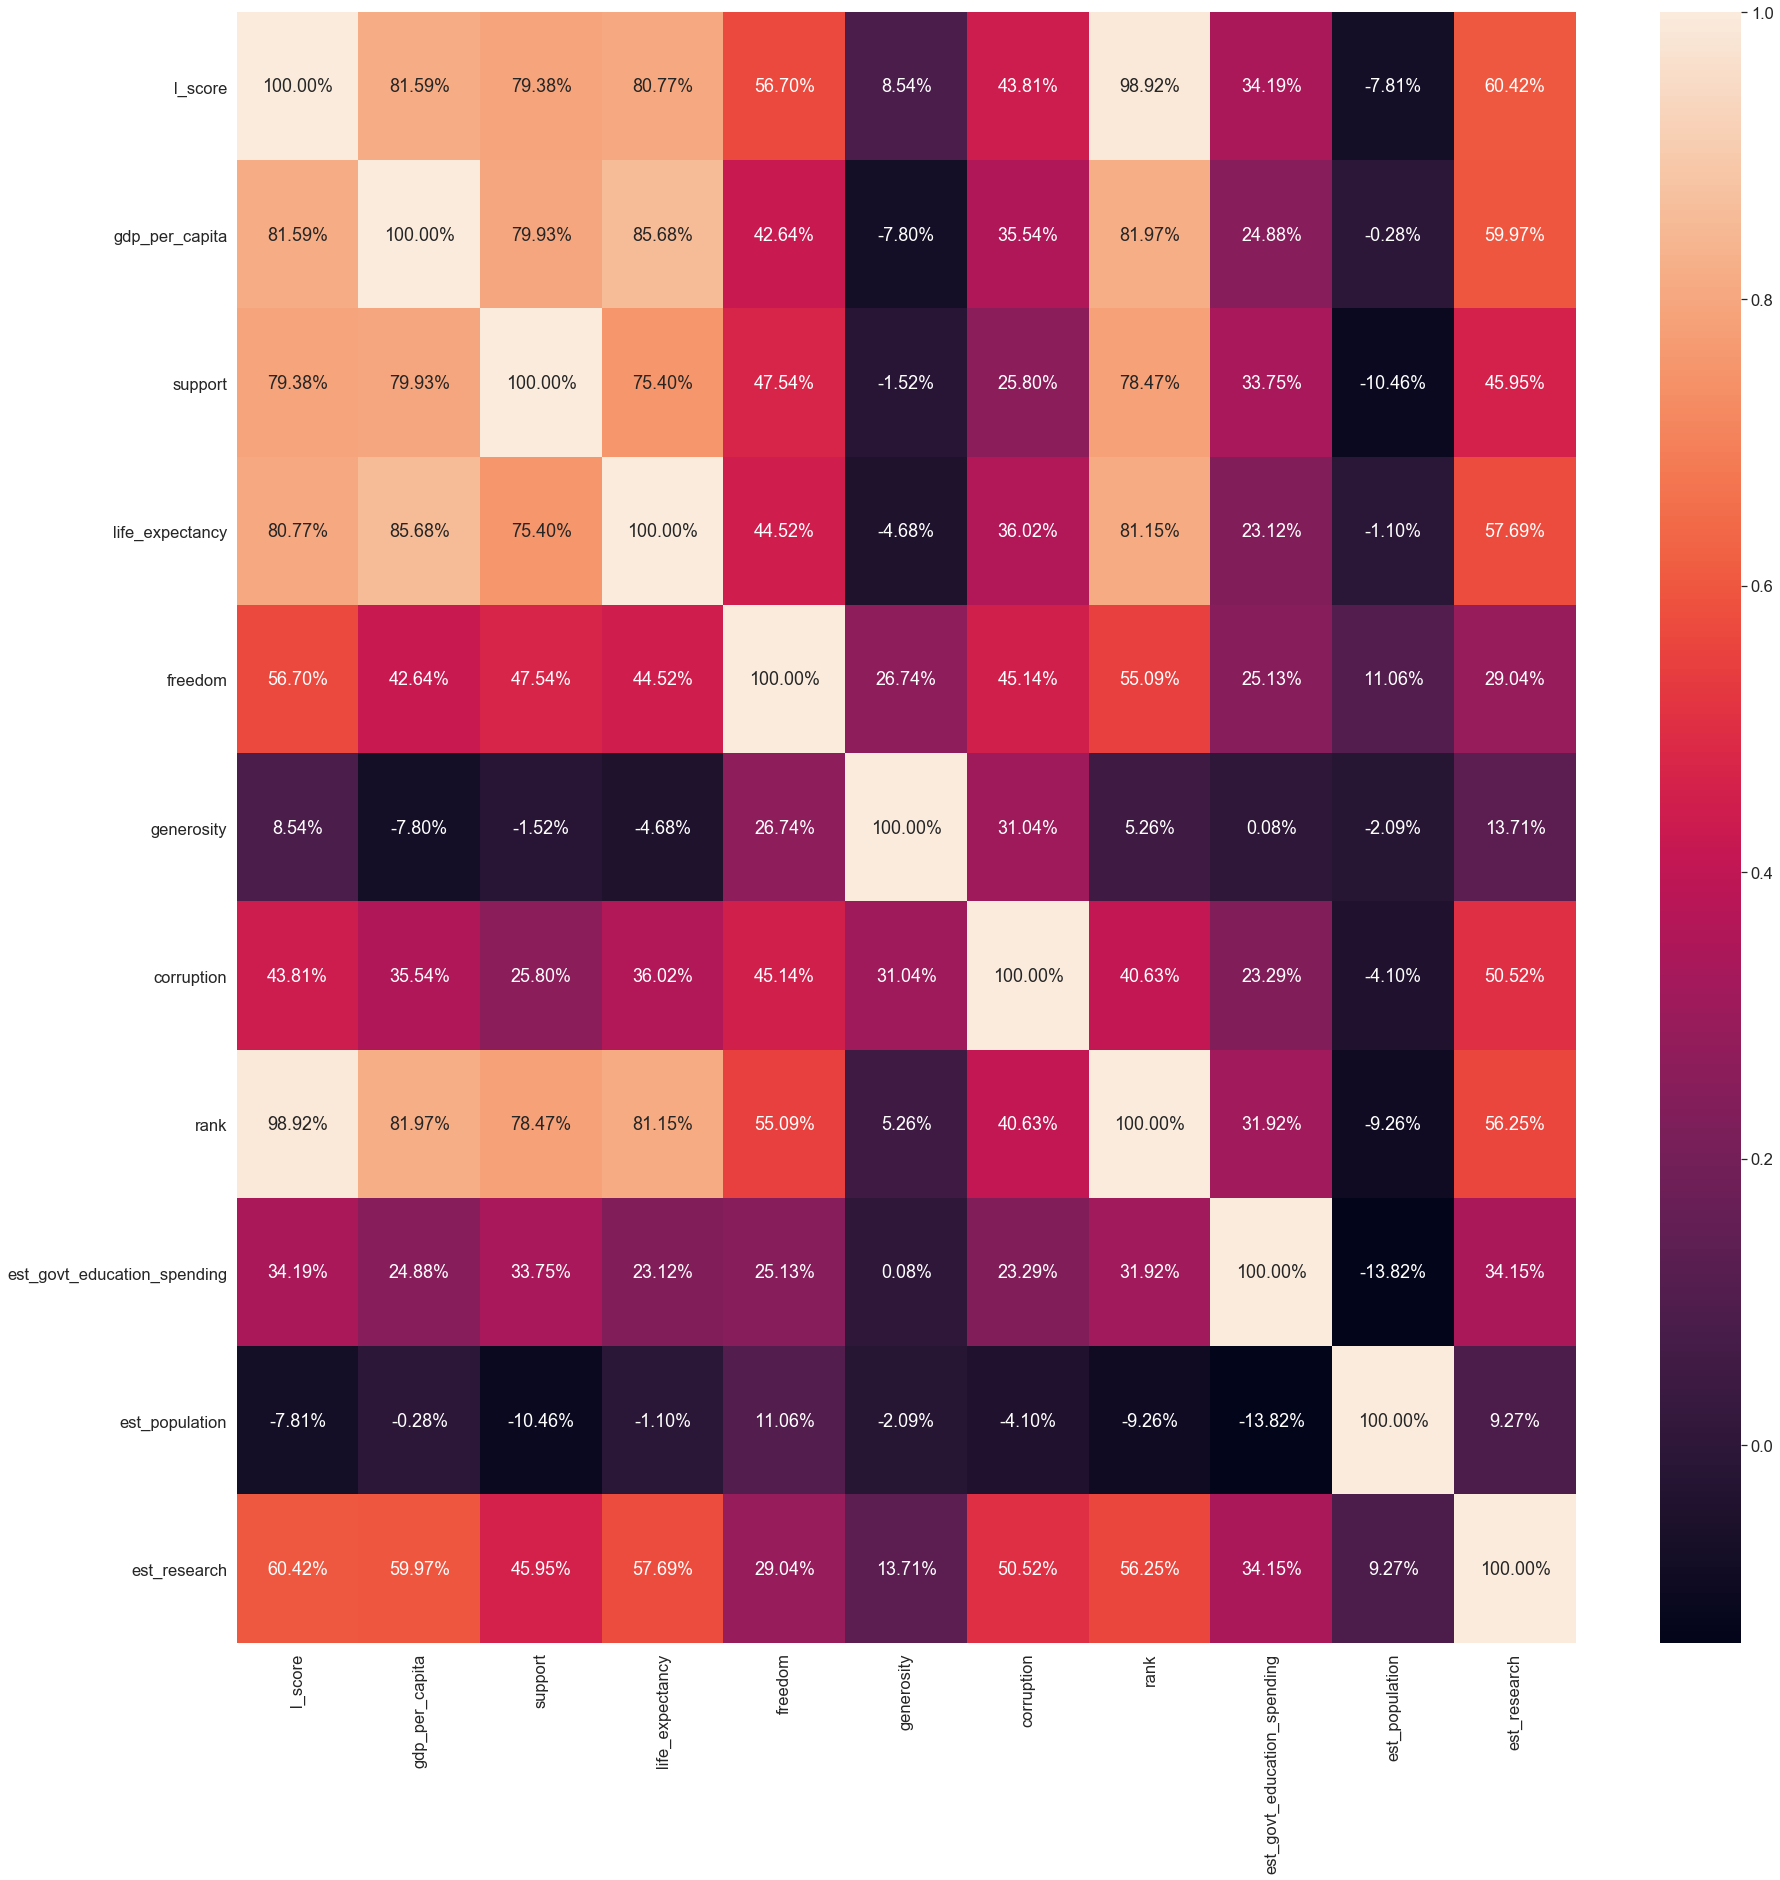

In [16]:
df_corr = df.drop(labels=['last_govt_spending_data', 'last_research_data', 'last_population_data'], axis=1)
corrs = df_corr.corr()
plt.figure(figsize=(30, 30))
sns.set(font_scale=1.5)
sns.heatmap(corrs, annot=True, fmt='.2%')

A scatter plot of ladder score to detect outliers is used. There does not appear to be any outliers, which makes sense based on how the ladder score is calculated, so all countries will be used in the analysis.

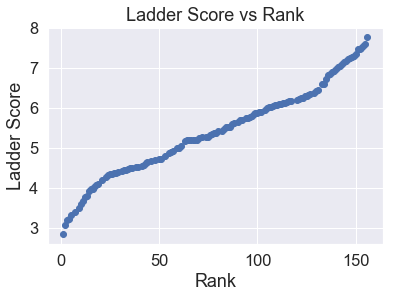

In [17]:
plt.scatter(df['rank'], df['l_score'])
plt.xlabel('Rank')
plt.ylabel('Ladder Score')
plt.title('Ladder Score vs Rank')
plt.show()

The Happiness Score is explained by the following factors: GDP per capita, Healthy Life Expectancy, Social support, Freedom to make life choices, Generosity, Corruption Perception. The following graphs show the rank of a country against two of these factors: GDP per capita and Generosity. There appears to be a positive correlation between rank and GDP per capita, and no correlation between rank and generosity. Their covariances are also noted.

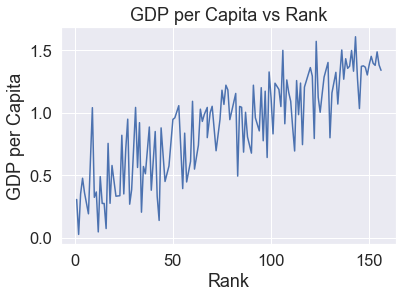

Covariance: 14.830210791117272


In [18]:
plt.plot(df['rank'], df['gdp_per_capita'])
plt.xlabel('Rank')
plt.ylabel('GDP per Capita')
plt.title('GDP per Capita vs Rank')
plt.show()
cov_gdp = df['rank'].cov(df['gdp_per_capita'])
print("Covariance: " + str(cov_gdp))

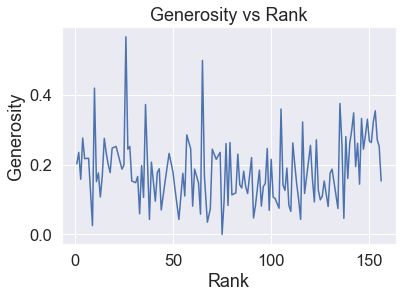

Covariance: 0.23480696275734445


In [19]:
plt.plot(df['rank'], df['generosity'])
plt.xlabel('Rank')
plt.ylabel('Generosity')
plt.title('Generosity vs Rank')
plt.show()
cov_generosity = df['rank'].cov(df['generosity'])
print("Covariance: " + str(cov_generosity))

A boxplot for the average ladder score for each region. With vastly different means, some regions appear to contain countries that are generally happier than countries of other regions. Thus, something about region may have an impact on happiness.

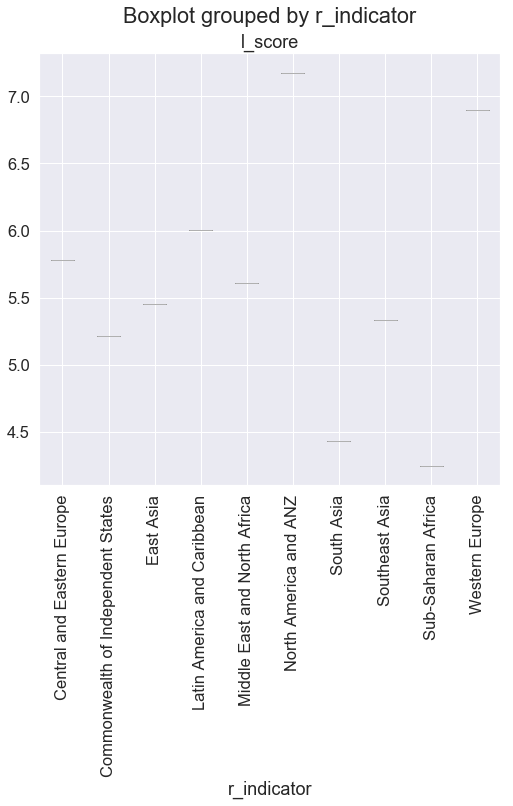

In [20]:
group = df.groupby('r_indicator').mean()
group = group.reset_index()
fig, ax = plt.subplots(figsize=(8,8))
group.boxplot('l_score', 'r_indicator', ax=ax)
plt.xticks(rotation=90)
plt.show()

## Preregistration of Analyses

Analysis 1: Linear Regression

* Find the relationship between each factor used to determine a country’s Happiness Score (social, economic, and political) and the Happiness Score itself 
* Analyze the relationships between the factors 
* Perform linear regression analysis between factors with the same main category (social, economic, political) and across categories (ex: social factor vs. political factor)
* Look further by finding correlations in the factors in specific regions of the world
* Build prediction models between factors and find their significance 
* Ex: What is the relationship between GDP per capita and estimated government education spending? In Europe? 
* This analysis will help our research questions in the following ways:
> * Determining which factors affect the happiness score
> * Finding how different factors relate to each other 

Analysis 2: Multivariate Regression

* Find which independent variables (factors) have a bigger impact on the dependent variable (Happiness Score)
* Build a model to to predict the Happiness Score of a country based on changes in certain variables (social, economic, or political factors)
* Perform the multivariate regression in three ways:
> * Use all the factors
> * Find factors that are significant (based on T-test or p-values and F-statistics) and repeat the regression (https://stattrek.com/regression/slope-test.aspx, https://towardsdatascience.com/the-complete-guide-to-linear-regression-in-python-3d3f8f06bf8, )  
> * Choose the factors with the highest coefficients and perform the regression 
* This analysis will help our research questions in the following ways:
> * Showing us which factors affect the happiness score more than others
> * Highlighting what factors are linked to unhappiness vs. happiness
> * Multivariate regression will also help us get over any occurrences of Simpson’s paradox. 


Analysis 3: Random Forest Regression [Stretch goal]
https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

* Use all the factors to build multiple decision trees to determine what combination of factors affects a country’s Happiness score
* Steps:
> * Pick k random points from the dataset
> * Construct a decision tree for these k points
> * Repeat the above steps to get N decision trees
> * Run a new data point through all N decision trees and output the average of all these predictions
> * Process can be repeated with changing parameters (ex: number of decision trees, depth of decision trees) to produce most accurate results
* This analysis will help our research questions in the following ways:
> * Helping to identify what combination of factor and at what probabilities of each factor are ideal to create either a “happy” or “unhappy” score
> * Random forest regressors can also help us conduct feature selection based on the importance scores provided by sklearn. 

## Linear Regression

In [21]:
my_linear_model = LinearRegression() 

def linearRegression(columns, y, df):
    for col in columns:
        my_linear_model.fit(df[col].values.reshape(-1, 1), df[y])
        slope = round(my_linear_model.coef_[0], 2)
        
        yhat = my_linear_model.predict(df[col].values.reshape(-1, 1))
        r2= round(r2_score(df[y], yhat), 2)
        
        print(col)
        print('==================')
        print('Slope: ' + str(slope))
        print('r^2 value: ' + str(r2) + "\n\n")
        

Linear regression is first performed with each of the six factors of the ladder score and the ladder score itself. For each one, the slope is printed out as well as the $r^2$ score, which indicates how much of a correlation there is.

In [22]:
features = ['gdp_per_capita', 'support', 'life_expectancy', 'freedom', 'generosity', 'corruption']

linearRegression(features, 'l_score', df)

gdp_per_capita
Slope: 2.38
r^2 value: 0.67


support
Slope: 3.02
r^2 value: 0.63


life_expectancy
Slope: 3.96
r^2 value: 0.65


freedom
Slope: 4.56
r^2 value: 0.32


generosity
Slope: 1.01
r^2 value: 0.01


corruption
Slope: 5.12
r^2 value: 0.19




Furthermore, we can determine if there is a linear correlation between the ladder score of a country and the other statistics we are measuring here: population, literacy rates, and government expenditure on education. We first drop the rows that do not have a numeric value for the relevant columns, and use this modified dataset on this part.

The $r^2$ score for population is about 0, suggesting that there is no linear relationship between the population of a country and its happiness. For government expenditure on education, there is a small positive correlation (positive slope), suggesting that countries that spend more on education are slightly happier.

In [23]:
df2 = df.dropna(subset = ['est_govt_education_spending', 'est_population', 'est_research'])

linearRegression(['est_govt_education_spending', 'est_population', 'est_research'],'l_score', df2)

est_govt_education_spending
Slope: 0.21
r^2 value: 0.09


est_population
Slope: -0.0
r^2 value: 0.02


est_research
Slope: 0.68
r^2 value: 0.37




This linear model looks at all of the countries equally. However, the results may differ depending on the region in the world we are looking at. As per the box plot above, the region with the highest happiness scores is North America, and the region with the lowest happiness scores is Sub-Saharan Africa. A linear model can be made specifically for these regions.

In [24]:
df_north_america = df[df['r_indicator'] == 'North America and ANZ']

linearRegression(features, 'l_score', df_north_america)

gdp_per_capita
Slope: -3.19
r^2 value: 0.78


support
Slope: 3.6
r^2 value: 0.73


life_expectancy
Slope: 2.34
r^2 value: 0.95


freedom
Slope: 3.09
r^2 value: 0.99


generosity
Slope: 4.11
r^2 value: 0.36


corruption
Slope: 1.76
r^2 value: 0.95




In [25]:
df_africa = df[df['r_indicator'] == 'Sub-Saharan Africa']

linearRegression(features, 'l_score', df_africa)

gdp_per_capita
Slope: 1.12
r^2 value: 0.23


support
Slope: 1.14
r^2 value: 0.26


life_expectancy
Slope: 1.12
r^2 value: 0.06


freedom
Slope: 1.29
r^2 value: 0.06


generosity
Slope: -0.61
r^2 value: 0.0


corruption
Slope: -3.75
r^2 value: 0.14




## Multivariate Regression

In [33]:
def multivariateRegression(features, y, df):
    my_linear_model.fit(df[features], df[y])

    print("coefficients:")
    print("-------------")
    for i in range(len(features)):
        print(features[i] + ": " + str(my_linear_model.coef_[i]))

    yhat = my_linear_model.predict(df[features])
    r2 = r2_score(df[y], yhat)
    print("\nr^2 value: " + str(r2))

Basic multivariate regression is performed using all of the six factors contributing to ladder score and ladder score itself. The slopes for each factor are printed out as well as the new $r^2$ score, which is a lot closer to one. This shows that a multivariate regression model is a better predictor of the happiness score than single linear regression.

In [34]:
multivariateRegression(features, 'l_score', df)

coefficients:
-------------
gdp_per_capita: 0.7839135140728546
support: 1.0934491510367703
life_expectancy: 1.3156874550884414
freedom: 1.1249636556925955
generosity: 0.6831052155768756
corruption: 1.060355642094375

r^2 value: 0.7882651823187181


In [35]:
X = np.column_stack((df['gdp_per_capita'], df['support'], df['life_expectancy'], df['freedom'], df['generosity'], df['corruption']))
y = df['l_score']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                l_score   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     77.56
Date:                Wed, 21 Apr 2021   Prob (F-statistic):           9.34e-40
Time:                        23:29:20   Log-Likelihood:                -102.23
No. Observations:                 132   AIC:                             218.5
Df Residuals:                     125   BIC:                             238.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7595      0.238      7.397      0.0

Looking at the p-values determine whether the variable is relevant to the model or not. x5 (generosity), has a large p-value, meaning that generosity is not statistically significant. The multivariate regression can be recomputed by removing this feature.

In [37]:
features2 = ['gdp_per_capita', 'support', 'life_expectancy', 'freedom', 'corruption']

multivariateRegression(features2, 'l_score', df)

coefficients:
-------------
gdp_per_capita: 0.7361824062277098
support: 1.110113575660463
life_expectancy: 1.2918922793740708
freedom: 1.2412182267955667
corruption: 1.2688565397144764

r^2 value: 0.7855533296782902


## Random Forest Regression

In [38]:
rf = RandomForestRegressor(n_estimators = 5)

In [39]:
df3 = df.drop(['country', 'r_indicator', 'last_population_data', 'last_govt_spending_data', 'last_research_data'], axis = 1)
df3 = df3.dropna()
labels = np.array(df3['l_score'])
df3 = df3.drop('l_score', axis=1)
feature_list = list(df3.columns)
df3 = np.array(df3)

In [40]:
rf.fit(df3, labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=5, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [41]:
predictions = rf.predict(df3)

In [42]:
errors = abs(predictions - labels)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees')

mape = (errors / labels) * 100
accuracy = 100 - np.mean(mape)
print('Accuracy: ' + str(round(accuracy, 2)) + '%')

Mean Absolute Error: 0.03 degrees
Accuracy: 99.36%


In [43]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [44]:
rf_tuned = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_tuned.fit(df3, labels)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   35.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.8min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=5, n_jobs=None,
                   

In [45]:
rf_tuned.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 50,
 'bootstrap': False}

In [46]:
rf_tuned.best_estimator_

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=50, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [47]:
predictions_best = rf_tuned.predict(df3)
errors_best = abs(predictions_best - labels)
print('Mean Absolute Error:', round(np.mean(errors_best), 2), 'degrees')

mape_best = (errors_best / labels) * 100
accuracy_best = 100 - np.mean(mape_best)
print('Accuracy: ' + str(round(accuracy_best, 2)) + '%')

improve = round(accuracy_best - accuracy, 3)
print("\nImprovement: " + str(improve) + "%")

Mean Absolute Error: 0.0 degrees
Accuracy: 100.0%

Improvement: 0.636%
